# What is a Face Landmark Estimation?
Where we identify key points on a face, such as the tip of the nose and center of each eye.
- Detect points on the faces

## How does Face Landmark Estimation work?
Face landmark estimation works by starting with a known set of points that should appear on any face. Then it moves those points around until they match the face image. In this case, we've located the eyebrows, eyes, nose, lips, and chin line. And because the points are predefined, we should already know which of the points make up the eyes, which make up the nose, and so on, so we can connect them with a line. This particular landmark estimation model is called a __68 point face landmark model__ because it looks for 68 specific landmarks on each face.

## How do we make the face recognition system run faster?
We can also use a face landmark model with fewer points.

Here's an example of a five point model. It only detects the edges of each eye and the bottom of the nose. Since it is detecting fewer points, it will run more quickly if five is enough.

In [9]:
from PIL import Image, ImageDraw
import PIL
import os
import face_recognition # access to the face detection model in DLIB

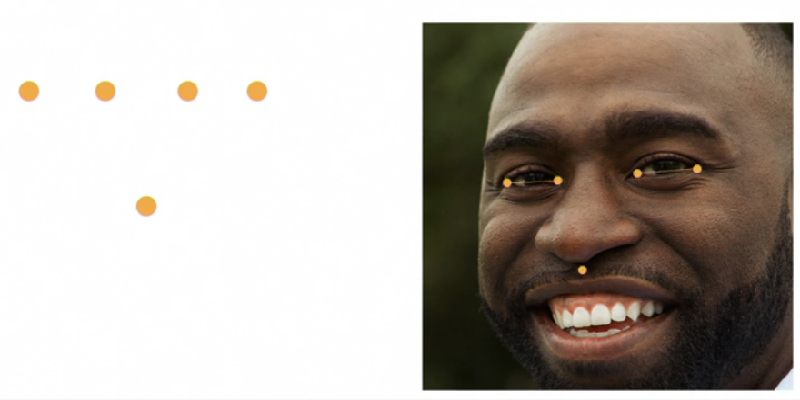

In [3]:
Image.open('Images/five_point.png').resize((800, 400))

### Main Use of the Estimation
The main use for face landmark estimation is called face alignment where we correct for head rotation when doing face recognition. We'll use it later in this course in our face recognition pipeline.


## Identifying Face Landmarks with a Machine Learning Model
1. __Overlay the entire face template on the face__
   - First, we'll assume that all human faces are roughly the same shape. Because of this assumption, all faces must be pretty close to our default face. So instead of trying to match up each point one at a time, we'll just overlay the entire face template on the face and then we'll only ask the computer to move and adjust the template so that each point is closer to the right point. 
   
   
2. __Add the constraint of how much the computer can move each point__
    - The next trick is that we'll add the constraint of how much the computer can move each point. The rule is that no single point can be moved too far from its neighboring points. Let's move these points into place. Notice that they all move a little but no point moves too far from its neighbor points. This constraint keeps the computer from coming up with face landmarks that are totally wrong. It makes the job easier for the computer since it doesn't have to learn how to find each point one of the time. It just has to learn how to push the points in the right direction. 
    
    
3. __Train several different machine learning models that each do part of the job__
    - The third trick we'll use is to split the job of completely fitting the face template into the face into smaller problems. In other words, we'll train several different machine learning models that each do part of the job. The first model is allowed to move the points a good bit but it doesn't have to get everything perfect. It just has to improve the fit over the starting point. 
    
    
4. __Then we'll train the second model, that takes the result of this, and tries to fine tune each point to get them a little bit closer to the right place. It will be allowed to move each point less than the first model. That's better.__
    - The second model only has to learn how to fix the mistakes of the first model. It doesn't have to learn the complex task of identifying face landmarks from scratch. This makes its job easier. 
    
This process of feeding one model's results into another model for fine tuning continues as many as 10 times. The end result of all 10 models working together is that the points end up in exactly the right place but each model only had to be able to do one small job. And once this cascade to face landmark model is trained, it should work for pretty much any face.

### Automatic Face Landmark Estimation
- The same face landmark estimation model should work for any face
- However, models don't transfer to other domains. A model trained on human faces won't work on cartoons

----------------------------

## Posing Faces Based on Face Landmarks

### Face Alignment
- Adjusting a raw face image so that key facial features (like the eyes, nose, and mouth) line up with a predefined template

### Why do we need to align face images?
We want our face recognition system to work even if the person isn't looking directly into the camera. When we take pictures in the real world, a person's head will usually be rotated and not looking directly at the camera. 

#### Issue
If we don't correct for this head rotation, it will be harder for our face recognition system to recognize people correctly. The system will have to understand that the same face rotated in different ways is the same person. 

#### Correcting the rotation
By correcting for head rotation, our face recognition system will have to do a little less work to recognize people and thus will be more accurate overall. 

-----------------------------

## Step 1: Detect Face Landmarks
1. Detect Face Landmarks
    -  In this example, we've detected five key points: the sides of each eye and the center point under the nose. Now that we know where the eyes and nose are, we need to figure out how to adjust the image so that the points in our image line up with the template on the right. 

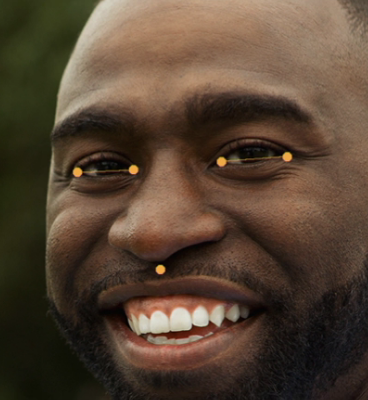

In [6]:
Image.open('Images/step_one.png')

## Step 2: Calculate Affine Transform
1. Figure out how to adjust the image so that the points in our image line up with the template on the right. But we don't want to distort the image too much because it would change the look of the face and throw off the face recognition system's accuracy. One simple solution is to calculate what's called an __affine transformation__

__Affine Transformation__
- An affine transformation is a linear mapping between set of points where parallel lines remain parallel 
- Basically, this means that we can move, rotate, and stretch our image, but we can't do more complex things like twisting or warping the image

### Calculating Affine Transformation
-  To calculate the affine transformation, we look at the position of the points on the left and figure out what amount of stretching and rotation would get them closest to the points on the right. Then we just apply that same math to the pixels in our image. 
- When we are writing the code in our face recognition system, we won't have to write any code to do this face alignment. 

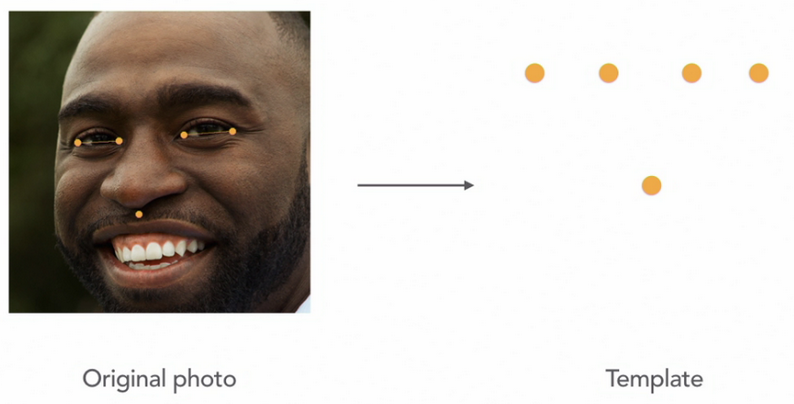

In [7]:
Image.open('Images/step_two.png')

## Face Landmark Code
Write the code to detect individual landmarks in each face in an image

### Group Photo

In [10]:
# Load the image into a numpy array
image = face_recognition.load_image_file('Images/people.jpg')
image_hs = face_recognition.load_image_file('Images/headshot.jpg')

# Find all facial features in all of the faces in the image using face_landmarks() that will output 
#  a list that contains entry for each face found in the image
face_landmarks_list = face_recognition.face_landmarks(image) # pass in the array with the image data
face_landmarks_list_hs = face_recognition.face_landmarks(image_hs) # pass in the array with the image data

# Number of faces found
number_of_faces = len(face_landmarks_list)
print('Found {} face(s) in this photograph.'.format(number_of_faces))

# Load the image into a PIL object so that we can draw on top of it
pil_image = PIL.Image.fromarray(image)
pil_image_hs = PIL.Image.fromarray(image_hs)

# Create a PIL drawing object that will be able to draw lines later
draw = PIL.ImageDraw.Draw(pil_image)
draw_hs = PIL.ImageDraw.Draw(pil_image_hs)

# Face list
face_list = [face_landmarks_list, face_landmarks_list_hs]

# PIL list
pil_list = [pil_image, pil_image_hs]

# Draw list
draw_list = [draw, draw_hs]

# Loop over each image
for image in face_list:
    
    # Loop over each face
    for face_landmarks in image:

        # Loop over each facial feature (eyes, nose, mouth, lips, etc.)
        for name, list_of_points in face_landmarks.items():

            # Print the location of each facial feature in the image
            #print("The {} in this face has the following points: {}".format(name, list_of_points))

            # Trace out each facial feature in the image
            draw.line(list_of_points, fill='red', width=2)

    pil_image.show()    
    Image.open('Images/facial_detection.png')

Found 6 face(s) in this photograph.


We'll call face_recognition.face_landmarks then we'll pass in the array with the image data, which we called image. 

Then we'll capture the result as a variable. Well call it face_landmarks_list equals that function call. 
- The result of the function is a list that contains entry for each face found in the image. If no faces were found in the image, the list will be empty. Otherwise, there will be one set of face landmarks for each face that was in the image. 

Each face will be a Python dictionary object. It's similar to a hashmap or a hashtable in other programming languages. The keys of the dictionary are the names of the facial feature. Things like left eye, right eye, chin, and so on. 
- The values for each key are the list of X,Y coordinates of the points that correspond to that facial feature. For example, each eye is a list of six points that trace a line from one end of the eye to another.

### Headshot Photo

Found 1 face(s) in this photograph.
The chin in this face has the following points: [(168, 175), (168, 197), (171, 221), (176, 244), (186, 266), (202, 285), (221, 300), (242, 312), (264, 314), (284, 310), (300, 296), (312, 279), (324, 260), (332, 239), (335, 219), (336, 197), (334, 177)]
The left_eyebrow in this face has the following points: [(186, 148), (197, 133), (214, 127), (232, 130), (247, 139)]
The right_eyebrow in this face has the following points: [(271, 140), (284, 132), (300, 131), (315, 138), (323, 151)]
The nose_bridge in this face has the following points: [(262, 157), (263, 168), (265, 179), (267, 192)]
The nose_tip in this face has the following points: [(245, 210), (255, 211), (264, 213), (273, 211), (282, 210)]
The left_eye in this face has the following points: [(206, 163), (215, 159), (226, 159), (235, 165), (226, 165), (215, 165)]
The right_eye in this face has the following points: [(283, 166), (292, 162), (302, 163), (310, 168), (302, 169), (292, 168)]
The top_

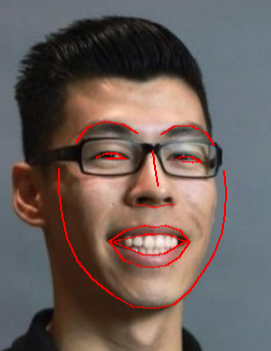

In [13]:
# Load the image into a numpy array
image = face_recognition.load_image_file('Images/headshot.jpg')

# Find all facial features in all of the faces in the image using face_landmarks() that will output 
#  a list that contains entry for each face found in the image
face_landmarks_list = face_recognition.face_landmarks(image) # pass in the array with the image data

# Number of faces found
number_of_faces = len(face_landmarks_list)
print('Found {} face(s) in this photograph.'.format(number_of_faces))

# Load the image into a PIL object so that we can draw on top of it
pil_image = PIL.Image.fromarray(image)

# Create a PIL drawing object that will be able to draw lines later
draw = PIL.ImageDraw.Draw(pil_image)

# Loop over each face
for face_landmarks in face_landmarks_list:
    
    # Loop over each facial feature (eyes, nose, mouth, lips, etc.)
    for name, list_of_points in face_landmarks.items():
        
        # Print the location of each facial feature in the image
        print("The {} in this face has the following points: {}".format(name, list_of_points))
        
        # Trace out each facial feature in the image
        draw.line(list_of_points, fill='red', width=2)

pil_image.show()
Image.open('Images/facial_detection_hs.png')